<a href="https://colab.research.google.com/github/SriramyaK/Machine-Learning-with-Python/blob/master/Car_booking_system_ver_1_0a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [357]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import sklearn
from datetime import date

In [360]:
path = '/content/drive/My Drive/Dataset'
os.listdir(path)

['test.csv', 'train_label.csv', 'test_label.csv', 'train.csv']

In [0]:
train_data = pd.read_csv(f'{path}/train.csv')
train_label = pd.read_csv(f'{path}/train_label.csv',header=None)
test_data = pd.read_csv(f'{path}/test.csv',parse_dates=True)
test_label = pd.read_csv(f'{path}/test_label.csv')

In [362]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [363]:
train_label.shape, train_data.shape

((8708, 1), (8708, 9))

In [0]:
train_data['Total Booking'] = train_label

In [365]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total Booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


Text(0, 0.5, 'Total Bookings')

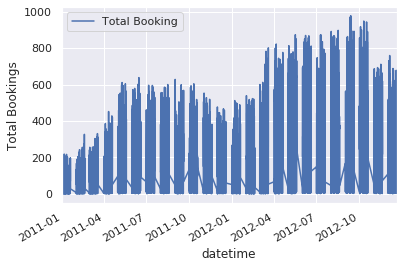

In [366]:
date_data = pd.DataFrame(pd.to_datetime(train_data['datetime']))
date_data['Total Booking'] = train_label
date_data = date_data.set_index('datetime')
date_data.plot()
plt.ylabel('Total Bookings')

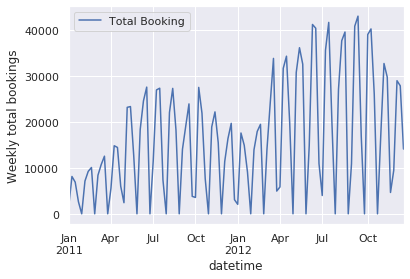

In [367]:
 weekly = date_data.resample('W').sum()        
 weekly.plot()        
 plt.ylabel('Weekly total bookings'); 

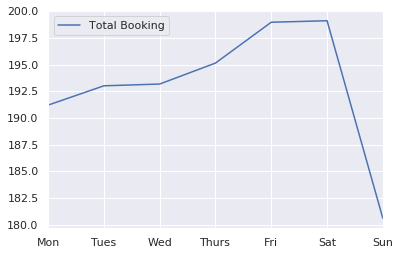

In [368]:
 by_weekday = date_data.groupby(date_data.index.dayofweek).mean()        
 by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']        
 by_weekday.plot();


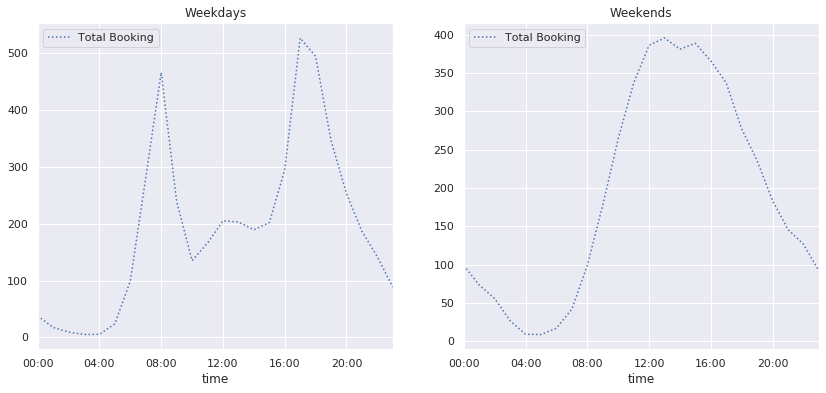

In [369]:
weekend = np.where(date_data.index.weekday < 5, 'Weekday', 'Weekend')        
by_time = date_data.groupby([weekend, date_data.index.time]).mean() 
hourly_ticks = 4 * 60 * 60 * np.arange(6)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))        
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])        
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',  xticks=hourly_ticks,style=[':', '--', '-'])


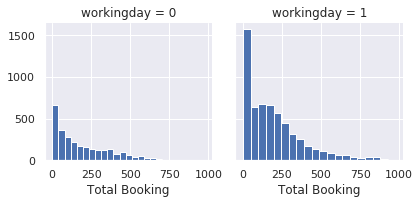

In [370]:
g = sns.FacetGrid(train_data, col='workingday')
g.map(plt.hist, 'Total Booking', bins=20)

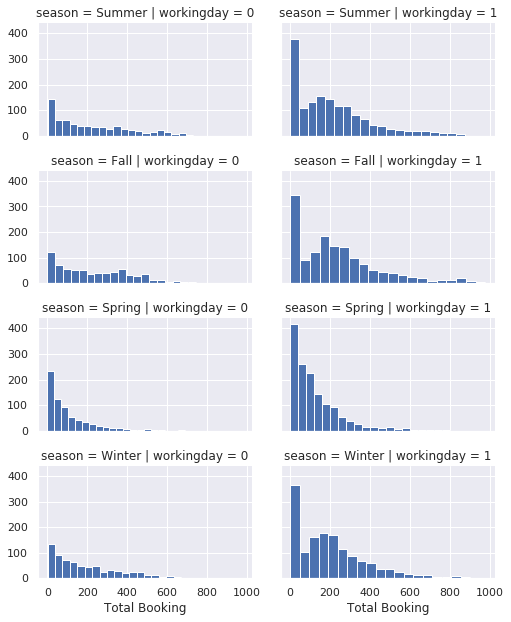

In [371]:
grid = sns.FacetGrid(train_data, col='workingday', row='season', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Total Booking', bins=20)
grid.add_legend();

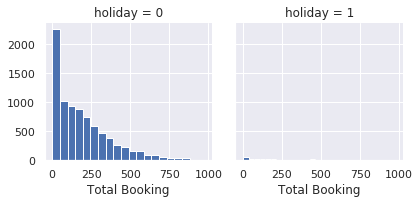

In [372]:
g = sns.FacetGrid(train_data, col='holiday')
g.map(plt.hist, 'Total Booking', bins=20)

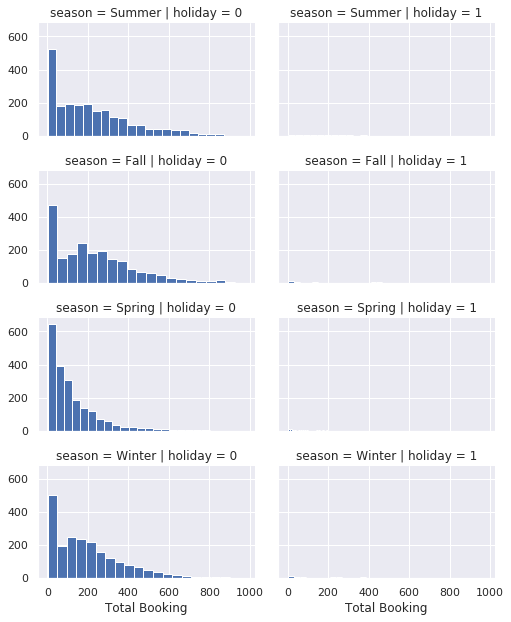

In [373]:
grid = sns.FacetGrid(train_data, col='holiday', row='season', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Total Booking', bins=20)
grid.add_legend();

In [374]:
train_data.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total Booking    0
dtype: int64

The info() method is useful to get a quick description of data, in particular the total number of rows, and each attribute's type and number of non-null values.

In [375]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
datetime         8708 non-null object
season           8708 non-null object
holiday          8708 non-null int64
workingday       8708 non-null int64
weather          8708 non-null object
temp             8708 non-null float64
atemp            8708 non-null float64
humidity         8708 non-null int64
windspeed        8708 non-null float64
Total Booking    8708 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


From the above info() method we can understand- 
1. 7 attributes are numerical.
2. No null values in the data.
3. 3 Columns are of object type datetime, season and weather.

Let's explore further:


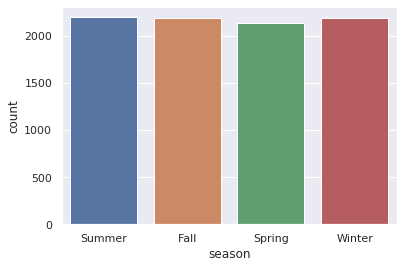

In [376]:
sns.countplot(x="season", data=train_data)

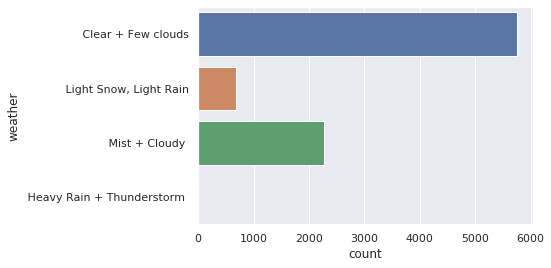

In [377]:
sns.countplot(y="weather", data=train_data)

In [378]:
train_data.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total Booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [0]:
attributes = ['temp',	'atemp',	'humidity',	'windspeed',	'Total Booking']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d73434160>,
      dtype=object)

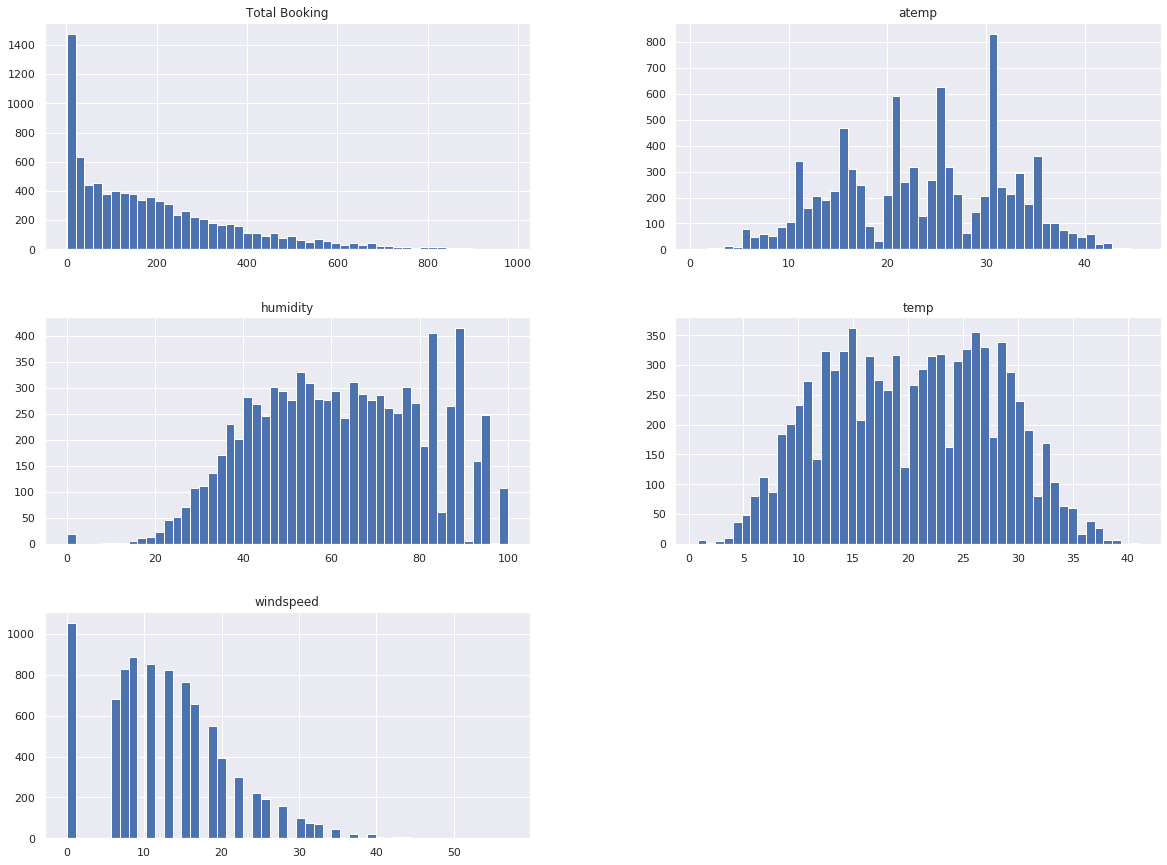

In [380]:
train_data[attributes].hist(bins=50, figsize=(20,15))

Outlier Analysis using Boxplots:

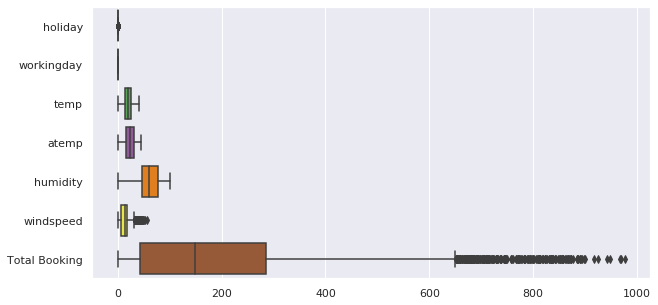

In [381]:
#sns.boxplot(x='windspeed',data=train_data)
plt.figure(figsize = (10,5))
ax = sns.boxplot(data = train_data, orient = "h", color = "violet", palette = "Set1")
plt.show()

In [0]:
corr_matrix = train_data.corr()

In [383]:
corr_matrix["Total Booking"].sort_values(ascending=False)

Total Booking    1.000000
temp             0.397456
atemp            0.392754
windspeed        0.092090
workingday       0.012285
holiday         -0.004391
humidity        -0.307982
Name: Total Booking, dtype: float64

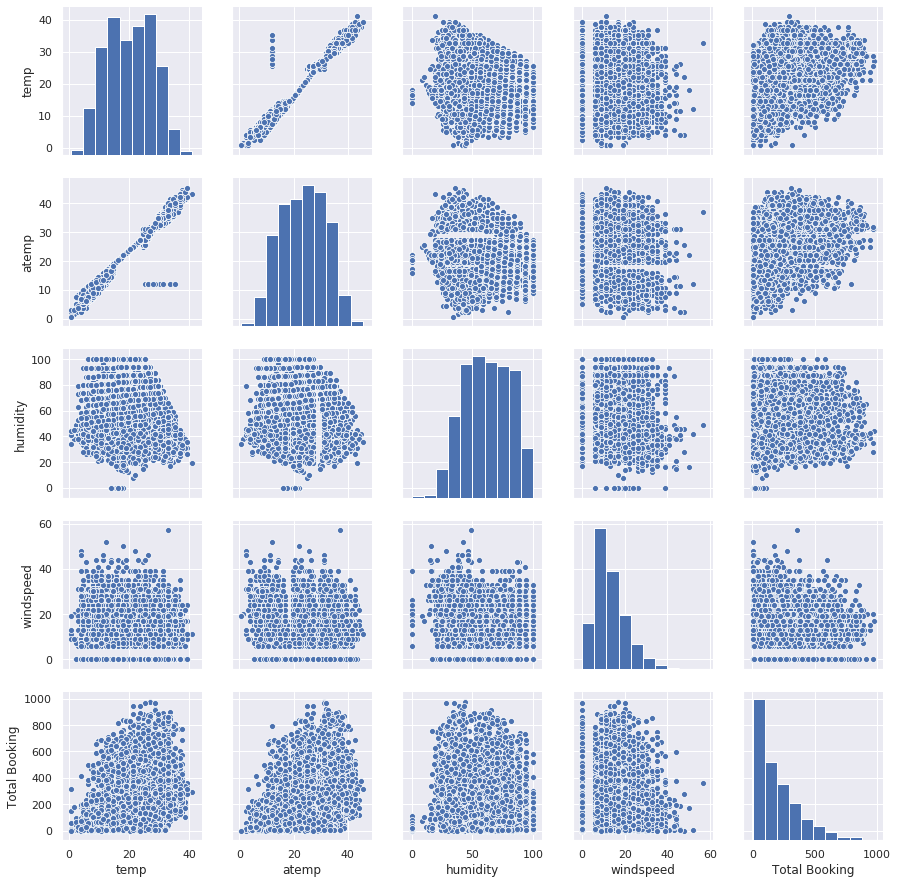

In [384]:
sns.pairplot(train_data[attributes])

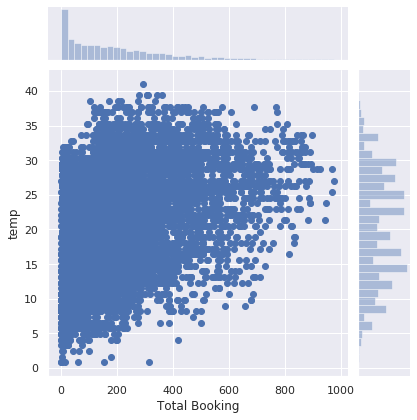

In [385]:
sns.jointplot(x="Total Booking", y="temp", data=train_data);

**Feature Engineering**
1. Convert the categorical variables in the train_data to one-hot encoding
2. Extract Date Features
3. Round decimal data

In [0]:
date_data = pd.DataFrame(pd.to_datetime(train_data['datetime']))

#Extracting Year from Date
train_data['Year'] = date_data['datetime'].dt.year

#Extracting Month from Date
train_data['Month'] = date_data['datetime'].dt.month

#Extracting the weekday name of the date
train_data['day_name'] = date_data['datetime'].dt.day_name()

In [387]:
final_data=train_data.drop(columns=['datetime'])
final_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total Booking,Year,Month,day_name
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,5,Wednesday
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,9,Wednesday
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,1,Thursday
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,11,Friday
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,9,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012,1,Monday
8704,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011,11,Thursday
8705,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011,4,Tuesday
8706,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012,11,Wednesday


Often when dealing with continuous numeric attributes like proportions or percentages, we may not need the raw values having a high amount of precision. Hence it often makes sense to round off these high precision percentages into numeric integers. 

In [0]:
def truncate(n):
  return round(n)

final_data['temp'] = final_data['temp'].apply(truncate)
final_data['atemp'] = final_data['atemp'].apply(truncate)
final_data['windspeed'] = final_data['windspeed'].apply(truncate)


In [0]:
attributes = ['season','weather','day_name']
one_hot_df = pd.get_dummies(final_data[attributes])

final_data = pd.concat([final_data,one_hot_df],axis=1)
final_data= final_data.drop(columns=attributes)

In [390]:
train_data_final = final_data
corr_matrix = train_data_final.corr()
corr_matrix['Total Booking'].sort_values(ascending=False)

Total Booking                          1.000000
temp                                   0.397406
atemp                                  0.392113
Year                                   0.266228
Month                                  0.170355
season_Fall                            0.141524
weather_ Clear + Few clouds            0.099981
windspeed                              0.092096
season_Summer                          0.070649
season_Winter                          0.024428
day_name_Saturday                      0.013888
day_name_Friday                        0.013277
workingday                             0.012285
day_name_Thursday                      0.004787
day_name_Wednesday                     0.000370
day_name_Tuesday                       0.000003
weather_ Heavy Rain + Thunderstorm    -0.001712
day_name_Monday                       -0.004068
holiday                               -0.004391
day_name_Sunday                       -0.028143
weather_ Mist + Cloudy                -0

In [391]:
train_data_final=train_data_final.drop(columns=['Total Booking'])
train_data_final.head()

,holiday,workingday,temp,atemp,humidity,windspeed,Year,Month,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,1,22,26,77,17,2012,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,0,1,29,33,79,19,2012,9,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,1,6,6,50,22,2011,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,14,17,29,9,2011,11,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
4,0,1,30,33,51,19,2011,9,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
attributes = ['temp','atemp','Year','Month','season_Fall','weather_ Clear + Few clouds','windspeed']
train_data_set1 = train_data_final[attributes]

Regression Models:

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_final, train_label, test_size=0.2, random_state=200)

Linear Regression:

In [0]:
lm = LinearRegression()

In [395]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions = lm.predict(X_test)

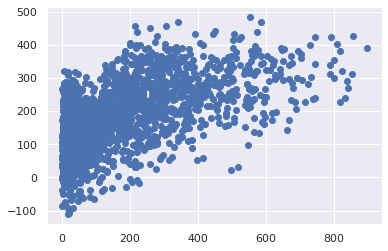

In [397]:
plt.scatter(y_test,predictions)

In [0]:
from sklearn.metrics import r2_score

In [399]:
print('R2-Score',r2_score(y_test,predictions))

R2-Score 0.3165971569858914


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_set1, train_label, test_size=0.2, random_state=200)
lm1 = LinearRegression()

In [0]:
lm1.fit(X_train,y_train)
predictions = lm1.predict(X_test)

In [402]:
print('R2-Score',r2_score(y_test,predictions))

R2-Score 0.26315127875207156


Random Forest

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_final, train_label, test_size=0.2, random_state=200)
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [410]:
forest_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
preds = forest_reg.predict(X_test)

In [412]:
print('R2-Score',r2_score(y_test,preds))

R2-Score 0.35249118427940895


Grid Search:

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = [{'n_estimators':[20,30], 'max_features': [2,4,6,8]},
              {'bootstrap':[False],'n_estimators':[3,10], 'max_features':[2,3,4]}]

In [0]:
forest_reg = RandomForestRegressor()

In [0]:
grid_search = GridSearchCV(forest_reg, param_grid,cv=5,scoring='r2',return_train_score=True)

In [428]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [429]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [430]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)